## Exploration of Image Transformations on RSNA Pneumonia Dataset


In [17]:
import matplotlib.pyplot as plt
from torchvision import transforms

from config import load_config
from rsna_dataloader import RSNAPneumoniaDataModule

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
CONFIG_PATH = "config.yml"
NUM_IMAGES = 8

configs = load_config(CONFIG_PATH)
rsna = RSNAPneumoniaDataModule(configs, batch_size=NUM_IMAGES)
test_dataloader = rsna.test_dataloader()
test_batch = next(iter(test_dataloader))

def plot(batch):
    fig, ax = plt.subplots(2, NUM_IMAGES//2, figsize=(NUM_IMAGES*1, 4))
    idx = 0
    for r in range(2):
        for c in range(NUM_IMAGES//2):
            img = batch["image"][idx].squeeze().permute(1,2,0).int()
            ax[r][c].set_title("Label: " + str(batch["target"][idx].item()))
            ax[r][c].imshow(img, cmap="gray")
            ax[r][c].axis("off")
            idx+=1

DISTRIBUTION LABEL BY GENDER
label_rsna_pneumonia     False     True 
Patient Gender                          
F                     0.782775  0.217225
M                     0.768561  0.231439
#train:  20412
#val:    2269
#test:   4003


### 1. Original Images From Test Set

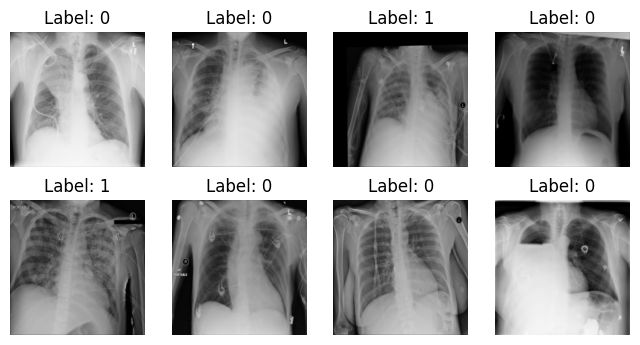

In [23]:
plot(test_batch)

### 2. Preprocessing and Augmentation for Model Training

#### 2.1 Preprocessing: Resize + Center Crop
Resize to 256 then center crop to:
- Remove text along edges
- Focus more on lungs

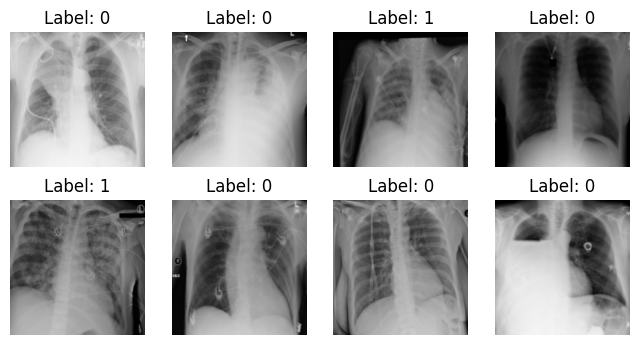

In [25]:
preprocess_transforms = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize(256, antialias=True), 
                                transforms.CenterCrop(224)])
test_dataloader = rsna.adj_test_dataloader(preprocess_transforms)
test_batch = next(iter(test_dataloader))
plot(test_batch)

#### 2.2 Augmentation: Rotation, Horizontal Flip, Resized Crop

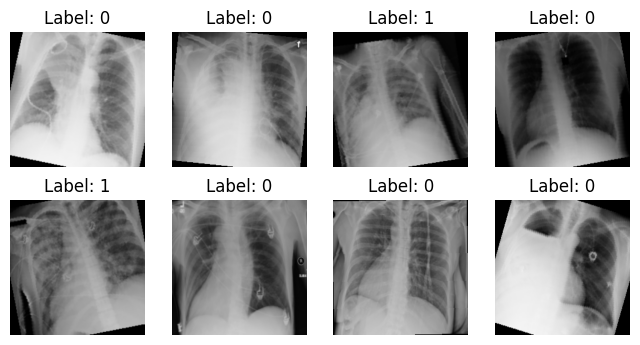

In [30]:
transform = transforms.Compose([preprocess_transforms,
                                transforms.RandomRotation(20),
                                transforms.RandomHorizontalFlip(0.5),
                                transforms.RandomResizedCrop(224, (0.9, 1), antialias=True)])
test_dataloader = rsna.adj_test_dataloader(transform)
test_batch = next(iter(test_dataloader))
plot(test_batch)

In [ ]:
class MyRotationTransform:
    """Rotate by one of the given angles."""

    # def __init__(self, angles):
    #     self.angles = angles

    def __call__(self, x):
        angle = 10
        return transforms.functional.rotate(x, angle)


transform = transforms.Compose([transforms.ToTensor(), MyRotationTransform()])
test_dataloader = rsna.adj_test_dataloader(transform)
test_batch = next(iter(test_dataloader))
plot(test_batch)